# MWS- WDA-Project 

## Homework Assignment: Data Analysis Using Python

In [94]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


## 1. Load the dataset into a Pandas DataFrame and perform any necessary data cleaning, such as handling missing values and converting data types.

### Load the dataset into a Pandas DataFrame

In [95]:
# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')
display(df.head(5))
print("shape",df.shape)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


shape (2823, 25)


In [96]:
display(df[["MONTH_ID","YEAR_ID","ORDERDATE"]])
print(df["YEAR_ID"].value_counts())


,MONTH_ID,YEAR_ID,ORDERDATE
0,2,2003,2/24/2003 0:00
1,5,2003,5/7/2003 0:00
2,7,2003,7/1/2003 0:00
3,8,2003,8/25/2003 0:00
4,10,2003,10/10/2003 0:00
...,...,...,...
2818,12,2004,12/2/2004 0:00
2819,1,2005,1/31/2005 0:00
2820,3,2005,3/1/2005 0:00
2821,3,2005,3/28/2005 0:00


2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64


In [97]:
df.shape

(2823, 25)

In [98]:
# Check for missing values
display(df.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

### we will remove the Column AddressLine2, POSTALCODE,STATE, and TERRITORY becuase it has null values.


In [99]:
# Drop rows with missing values
df = df.drop('TERRITORY', axis=1)
df = df.drop('STATE', axis=1)
df = df.drop('ADDRESSLINE2', axis=1)
df = df.drop("POSTALCODE",axis=1)
df.shape

(2823, 21)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  CITY              2823 non-null   object 


### change the datatype of columns

In [101]:
# Convert data types
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['PRICEEACH'] = pd.to_numeric(df['PRICEEACH'])
df['QUANTITYORDERED'] = pd.to_numeric(df['QUANTITYORDERED'])

## 2. Compute the following metrics for each product:

### Total revenue generated.

In [102]:
display(df["STATUS"].value_counts())

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [103]:
df["PRODUCTCODE"].value_counts()

S18_3232    52
S10_1949    28
S24_1444    28
S10_4962    28
S24_2840    28
            ..
S18_1749    22
S24_2887    22
S24_3969    22
S18_4409    22
S18_4933    22
Name: PRODUCTCODE, Length: 109, dtype: int64

<span style="color:red;font-size:20px"> we will assume that only "shipped status orders" return a revenue to the company</span>

In [123]:
df_shipped_orders= df[df["STATUS"]=="Shipped"]
display("shape of shipped orders dataframe",df_shipped_orders.shape)

'shape of shipped orders dataframe'

(2617, 21)

<h3>Find :</h3>
<ul style="font-weight:bold;font-size:15px"> 
    <li>Total units sold.</li>
    <li> Average price per unit.</li>
    <li>Total number of orders.</li>
</ul>

In [108]:
# Compute metrics for each product
product_metrics = df_shipped_orders.groupby('PRODUCTCODE').agg({
    'PRICEEACH': 'mean',
    'QUANTITYORDERED': 'sum',
    'ORDERNUMBER': 'count',
    'SALES': 'sum'
})

In [109]:
# Rename columns
product_metrics.rename(columns={
    'PRICEEACH': 'AVG_PRICE',
    'QUANTITYORDERED': 'UNITS_SOLD',
    'ORDERNUMBER': 'NUM_ORDERS',
    'SALES': 'TOTAL_REVENUE'
}, inplace=True)

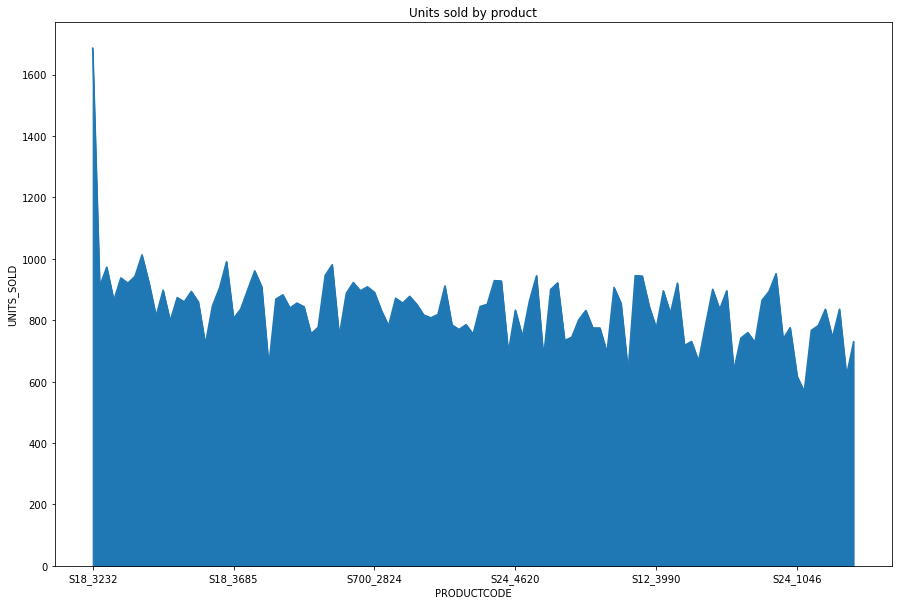

,AVG_PRICE,UNITS_SOLD,NUM_ORDERS,TOTAL_REVENUE
PRODUCTCODE,,,,
S18_3232,98.986531,1686,49,274799.86
S10_1949,100.000000,911,27,179072.03
S12_1108,93.950000,973,26,168585.32
S10_4698,98.537600,865,25,161182.91
S18_2238,99.538462,938,26,149305.91
S12_3891,96.954615,921,26,145332.04
S12_2823,99.156800,943,25,136558.38
S24_3856,97.994231,1013,26,135478.90
S18_4027,100.000000,922,26,133779.35


In [110]:
# Rank products by total revenue generated
product_metrics.sort_values('TOTAL_REVENUE', ascending=False, inplace=True)
product_metrics["UNITS_SOLD"].plot(kind='area',figsize=(15,10),)
plt.xlabel('PRODUCTCODE')
plt.ylabel('UNITS_SOLD')
plt.title('Units sold by product')
plt.show()
# Print the ranking and recommend products to focus on
display(product_metrics.head(10))

<br>
<h2 style="color:green;font-size:20px;font-weight:bold">
    
We Find that The Product S18_3232 has the highest number of unites sales and highest in the Total GROSS Revenue 
    the previous table shows the top 10 highest gross revenue per product.
    
</h2>
<br>

In [115]:
# Compute metrics for each month
monthly_metrics = df_shipped_orders.groupby(df['ORDERDATE'].dt.to_period('M')).agg({
    'PRICEEACH': 'mean',
    'QUANTITYORDERED': 'sum',
    'SALES': 'sum'
})
# Rename columns
monthly_metrics.rename(columns={
    'PRICEEACH': 'AVG_PRICE',
    'QUANTITYORDERED': 'UNITS_SOLD',
    'SALES': 'TOTAL_REVENUE'
}, inplace=True)

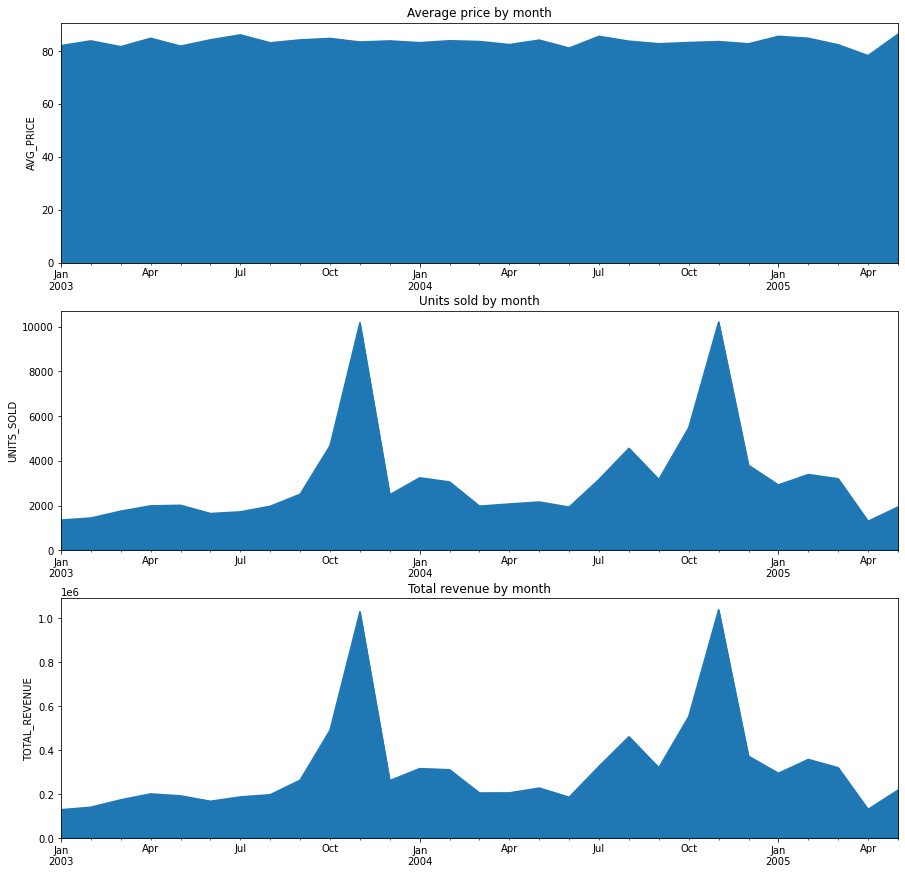

In [139]:
#AVG_PRICE, UNITS_SOLD, and TOTAL_REVENUE by month:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
monthly_metrics['AVG_PRICE'].plot(ax=axs[0], kind='area')
axs[0].set_xlabel('')
axs[0].set_ylabel('AVG_PRICE')
axs[0].set_title('Average price by month')
monthly_metrics['UNITS_SOLD'].plot(ax=axs[1], kind='area')
axs[1].set_xlabel('')
axs[1].set_ylabel('UNITS_SOLD')
axs[1].set_title('Units sold by month')
monthly_metrics['TOTAL_REVENUE'].plot(ax=axs[2], kind='area')
axs[2].set_xlabel('')
axs[2].set_ylabel('TOTAL_REVENUE')
axs[2].set_title('Total revenue by month')
plt.show()

<br>
<div style="color:green;font-size:20px;font-weight:bold">
    
Number of sales and the total revenue is increasing between October and December each year
    
    
</div>
<br>

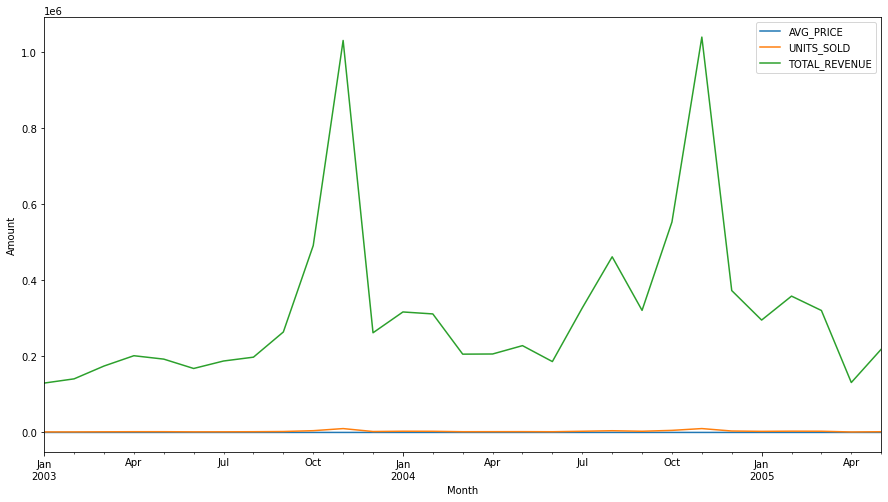

In [145]:
# Plot metrics over time
fig, ax = plt.subplots()
monthly_metrics.plot(ax=ax, kind='line',figsize=(15, 8))
ax.set_xlabel('Month')
ax.set_ylabel('Amount')
ax.legend(loc='best')

## Identify the top 5 cities where the company has the highest sales and provide recommendations on how the company can increase its sales in other cities.

In [150]:
# Identify top 5 cities with highest sales
city_metrics = df_shipped_orders.groupby('CITY').agg({'SALES': 'sum'})
city_metrics.sort_values('SALES', ascending=False, inplace=True)
top_cities = city_metrics.head(5).index.tolist()
print(f'Top 5 cities with highest sales: {", ".join(top_cities)}')

# Filter dataframe to include only top 5 cities
df_top_cities = df_shipped_orders[df_shipped_orders['CITY'].isin(top_cities)]
city_metrics.head(5)

Top 5 cities with highest sales: Madrid, San Rafael, NYC, Singapore, Paris


,SALES
CITY,
Madrid,911769.83
San Rafael,647596.31
NYC,515430.11
Singapore,288488.41
Paris,268944.68


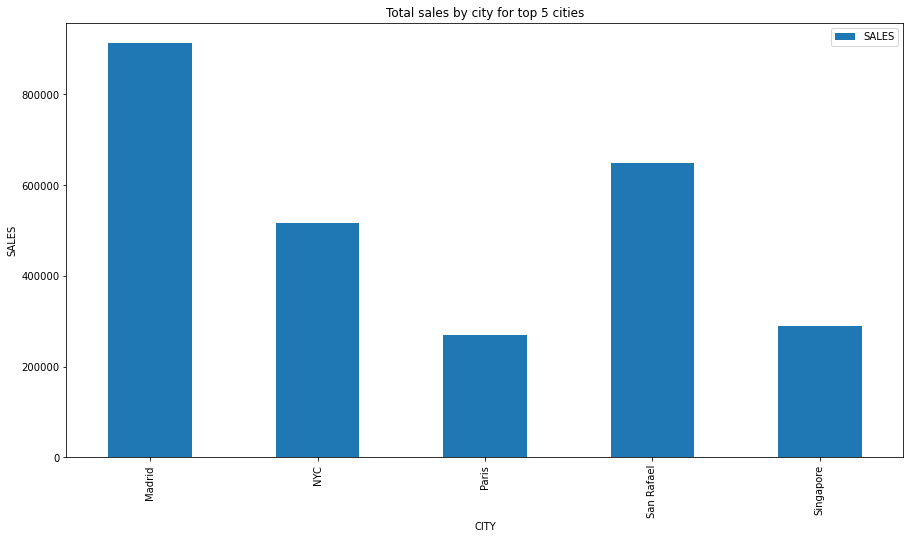

In [151]:
#SALES by CITY:
city_metrics_top = df_top_cities.groupby('CITY').agg({'SALES': 'sum'})
city_metrics_top.plot(kind='bar',figsize=(15, 8))
plt.xlabel('CITY')
plt.ylabel('SALES')
plt.title('Total sales by city for top 5 cities')
plt.show()

In [185]:
df_not_shipped=df[df["STATUS"]!="Shipped"]
df_test = df_not_shipped.groupby(by=["STATUS","CITY"]).agg({'ORDERNUMBER': 'count'})

df_test

ORDERNUMBER
STATUS     CITY                     
Cancelled  Boras                  16
           Liverpool              14
           Madrid                 16
           NYC                    14
Disputed   Glen Waverly            5
           Kobenhavn               3
           Madrid                  6
In Process Allentown               2
           Bruxelles               5
           Chatswood              13
           Madrid                  6
           Nantes                 13
           San Rafael              2
On Hold    Boston                 14
           Lule                    6
           Newark                 12
           San Jose               12
Resolved   Graz                    8
           Kobenhavn               8
           Madrid                 18
           Pasadena               13

<br>
<div style="color:green;font-size:20px;">
    <div style="font-weight:bold;" >Cities of Glen Waverly, kobenhavn, and Madrid: </div> 
    <br>
    <div>    there is a problem with the payment cause it has a high number of Disputed orders. Recommendation 
    add an easy payment method </div>
    <br>
    <div style="font-weight:bold">Cities of Chatswood, Nantes: </div> 
    <br>
    <div>  there is a high number of in process orders, recommend speeding up the process.</div>
</div>
<br>